# Problem statement

In the face of burgeoning urban populations and evolving socio-economic dynamics, a distinguished group of investors seeks to establish a real estate 
firm in the vibrant city of Paris. They wish to address the pressing issue of affordable housing that has emerged as a critical challenge.
Recognizing the intricacies of the local market, they have engaged Mali Safi and Sons to analyze existing data, draw meaningful insights, and 
guide their strategic decisions. Mali safi and sons has decided to use regression models to understand how different variables affect the real 
estate market and identify trends that the business can take advantage of.

Essentially the real estate company wants:

i. To identify the variables affecting the prices 

ii. To construct a regression model that correlates the property prices with the variables
  
iii. To evaluate the performance of the regression model in identifying the factors affecting property prices.

# Data Understanding

In [1]:
#importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [2]:
#Loading the dataframe and viewing the first 10 rows
df = pd.read_csv('ParisHousing.csv')
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [3]:
#Checking the shape of the data
df.shape

(10000, 17)

Our dataset has 10000 rows and 17 columns

In [4]:
#Understanding the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
#Understanding the descriptive statistics of the data
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


# Data Preparation and Cleaning

## Defining Variables
Dependent variable:
   
    1. Price

Independent variables: 
    
    1. Square meters
    2. No of rooms
    3. Has pool
    4. Has yard
    5. Year made
    6. Is new built
    7. Has storm protector
    8. Basement
    9. Attic
    10. Garage
    11. Storage room
    12. Guest room

Categorical Variables:

    1. has_pool
    2. has_storm_protector
    3. has_basement
    4. has_attic
    5. has_garage
    6. has_storage_room
    7. has_guest_room
    8. made: year the property was made
    9. isNewBuilt
    10. floors

Continuous Variables:

    1. Price
    2. square meters: Size of the Property
    3. Number of Rooms

In [6]:
#Creating a new dataframe for analysis
new_df = df.loc[:, ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
                      'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']]
new_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [7]:
#Checking for null values
new_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
#Checking for duplicates
new_df.duplicated().sum()

0

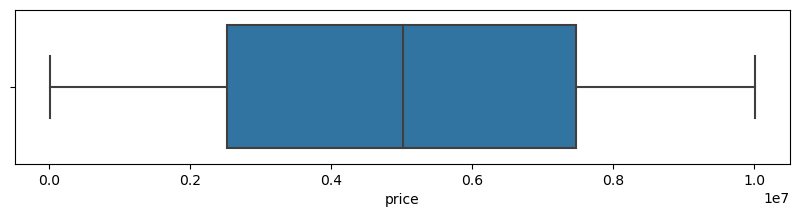

In [9]:
#checking for outliers
plt.figure(figsize=(10,2))

sns.boxplot(x = 'price', data = new_df)

# Display the plot
plt.show()